<a href="https://colab.research.google.com/github/mikiiiiiiiiiiiiiiiiiiii/progetto_esame_AI/blob/main/progetto_classificazione_con_dataset_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLASSIFICAZIONE FASHION MNIST**<br>In questo notebook si classificherà il dataset Fashion Mnist attraverso vari algoritmi al fine di scegliere il migliore. 

Importiamo le librerie che servono:  

1.   **numpy**: *per il calcolo numerico*;
2.   **pandas**: *per l'analisi e manipolazione dei dati*;
3.   **tensorflow e keras**: *per le reti neurali*;
4.   **sklearn**: *per gli algortimi di machine learning*;
5.  **matplotlib e seaborn**: *per la visualizzaione dei dati*.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential, layers
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import metrics
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier , export_graphviz
from sklearn.metrics import accuracy_score , confusion_matrix , ConfusionMatrixDisplay

Carichiamo i dati già presenti nella libreria di keras.<br> I dati rappresentano delle immagini di abbigliamento, ogni immagine è composta da 28x28 pixels di scale di grigio ( da 0 a 255).<br>
Abbiamo 60000 immagini per il dataset di train e 10000 immagini per il dataset di test.

In [6]:
(keras_x_train, keras_y_train), (keras_x_val, keras_y_val) = fashion_mnist.load_data()

# Each training and test example is assigned to one of the following labels:

class_map = {0:'T-shirt/top',
             1:'Trouser',
             2:'Pullover',
             3:'Dress',
             4:'Coat',
             5:'Sandal',
             6:'Shirt',
             7:'Sneaker',
             8:'Bag',
             9:'Ankle boot'}


4431872/4422102 [==============================] - 0s 0us/step


In [7]:
class_map.values()

dict_values(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

In [8]:
np.shape(keras_x_train.T)
np.shape(np.transpose(keras_x_val))

(28, 28, 10000)

Cambiamo da tre dimensioni a due la forma del dataset per esplorare meglio i valori delle features.<br>Ora ogni riga rappresenta un'immagine. 


In [9]:
# w = keras_x_train[:,:,0]
# for index, valore in enumerate(range(1 , np.shape(keras_x_train)[2])):
#  w = np.hstack((w , keras_x_train[:,:,index]))
# x = keras_x_val[:,:,0]
# for i, v in enumerate(range(1 , np.shape(keras_x_val)[2])):
#  x = np.hstack((x , keras_x_val[:,:,i]))
# print('shape di x train', np.shape(w), '\nshape di x val', np.shape(x))
V=pd.DataFrame(keras_x_train.reshape((60000,784)))

Trasformiamo i nostri dati da vettori numpy a dataframe pandas.

In [10]:
#transformiamo gli array in dataframe con il nome di ogni colonna corrispondente al numero del pixel cui la colonna si riferisce
col = []
for i in range(784):
  col.append('pixel_'+ str(i))
X_train = pd.DataFrame( keras_x_train.reshape((60000,784)) , columns = col)
y_train = pd.DataFrame(keras_y_train , columns = ['labels'])
X_val = pd.DataFrame(keras_x_val.reshape((10000,784)) , columns = col)
y_val = pd.DataFrame(keras_y_val , columns = ['labels'])

X_val , X_test , y_val , y_test = train_test_split(X_val , y_val , test_size = 0.4)


In [11]:
np.shape(y_train.to_numpy().T)

(1, 60000)

In [62]:
scaler1=StandardScaler()
scaler2=StandardScaler()
X_train=scaler1.fit_transform(X_train)

# scaler2.fit_transform(y_train)
# scaler1.transform(x_val)
# scaler2.transform(y_val)
# myparamas=scaler1.get_params()
# myparamas
X_train


array([[-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       ...,
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729],
       [-0.00864371, -0.02322333, -0.03917806, ..., -0.15681128,
        -0.08967308, -0.03414729]])

**Exploratory data analysis**<br>Esploriamo i nostri dati per conoscere meglio i possibili valori e range delle features, i valori  mancanti ed eventuali outliers.

In [13]:
X_train.describe()

pixel_0       pixel_1  ...     pixel_782     pixel_783
count  60000.000000  60000.000000  ...  60000.000000  60000.000000
mean       0.000800      0.005783  ...      0.819000      0.070883
std        0.092554      0.249033  ...      9.133252      2.075829
min        0.000000      0.000000  ...      0.000000      0.000000
25%        0.000000      0.000000  ...      0.000000      0.000000
50%        0.000000      0.000000  ...      0.000000      0.000000
75%        0.000000      0.000000  ...      0.000000      0.000000
max       16.000000     36.000000  ...    255.000000    170.000000

[8 rows x 784 columns]

In [14]:
X_val.head()

pixel_0  pixel_1  pixel_2  ...  pixel_781  pixel_782  pixel_783
6703        0        0        0  ...          0          0          0
4932        0        0        0  ...         56          0          0
170         0        0        0  ...          0          0          0
2390        0        0        0  ...          0          0          0
8064        0        0        0  ...          0          0          0

[5 rows x 784 columns]

Il dataset è bilanciato, abbiamo un uguale numero di capi d'abbigliamento.
Sia il train che il validation.

In [15]:
y_train.describe()

labels
count  60000.000000
mean       4.500000
std        2.872305
min        0.000000
25%        2.000000
50%        4.500000
75%        7.000000
max        9.000000

In [16]:
y_val.describe()

labels
count  6000.000000
mean      4.480500
std       2.866587
min       0.000000
25%       2.000000
50%       4.000000
75%       7.000000
max       9.000000

Nessuno dei dataset presenta valori mancanti.

In [17]:
one = X_train.isnull().sum().sum()
two = y_train.isnull().sum().sum() 
three = X_val.isnull().sum().sum()
four = y_val.isnull().sum().sum()
print(one + two + three + four , 'missing values')

0 missing values


Immagine alla riga 1 del dataset di training: Vestito

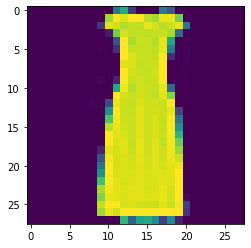

In [55]:
image = X_val.iloc[0,:]
image = np.array(image).reshape((28,28))
plt.figure()
plt.imshow(image)

Immagine alla riga 1 del dataset di training: Maglietta

In [63]:
image = X_train.iloc[1,:]
image = np.array(image).reshape((28,28))
plt.figure()
plt.imshow(image)

AttributeError: ignored

> # **Convolutional Neural Network**<br />

L'architettura migliore di una rete neurale per il riconoscimento delle immagini ci è fornita dalla **rete neurale convoluzionale**, è un particolare tipo di rete che sfrutta il riconoscimento di **pattern** all'interno del dataset fornitole grazie all'uso di **kernel**. I kernel sonon delle matrici (o vettori) di pesi che verrano allenati e che cercano un determinato pattern all'interno dell'immagine; il movimento dei kernel all'interno della figura è definito dallo **stride**, mentre il **padding** è la misura che indica come la rete si deve comportare quando arriva ai limiti dell'immagine.<br />Per diminuire il numero dei pesi da allenare all'interno di una CNN si possono inserire layer di **pooling** che estraggono valori da un gruppo di pixels, tali valori sono la media o il massimo (ipotesi: un gruppo di pixels vicini assumerà valori molto simili). Alla fine di una CNN solitamente vengono inseriti dei layers standard fully connected e un layer finale con nodi pari al numero di labels e funzione di attivazione **softmax** in modo da classificare al meglio il dataset di partenza.<br>[Architettura di una rete neurale convoluzionale](https://miro.medium.com/max/731/1*kQtbGWZgi3n35Qojkg8cFw.png)<br>
> # **Funzionamento generale di una rete neurale**<br />

Le **reti neurali** sono una famiglia di algoritmi che possono essere utilizzati sia per classificare sia per predire, è composta da **strati** che a loro volta sono composti da nodi (detti **neuroni**), in ogni strato avvengono dei prodotti vettoriali tra pesi e input i cui risultati vengono applicati ad una funzione detta **'di attivazione'** scelta dal data analyst.<br>La rete neurale viene allenata attraverso un algoritmo chiamato **di discesa del gradiente** che permette attraverso numerose iterazioni di raggiungere il minimo di una funzione; la **funzione di costo** da minimizzare è spesso la MSE, ma ne esistono di diverse a seconda dell'obiettivo da raggiungere(classificazione o regressione).<br>Per calcolare le derivate parziali relative al gradiente in un certo punto in maniera computazionalmente efficiente si ricorre alla **backpropagation**, ossia partendo dallo strato finale e procedendo a ritroso (chain rule).<br>[Architettura di una rete neurale](https://ingsuicidio.it/ingsuicidio_content/uploads/2017/02/neural_net2-768x377.jpeg)

L'architettura del nostro modello comprenderà 7 strati:


1.   **Strato di input**: immagine 28x28;
2.   **Strato convoluzionale**: 32 kernel di grandezza 3x3 e funzione di      attivazione Relu;
3.   **Strato di maxpooling**: prendiamo il valore massimo per ogni matrice di valori 2x2 senza over-lapping ( essendo lo stride uguale a 2); 
4.   **Strato convoluzionale**: 64 kernel di grandezza 3x3 e funzione di attivazione Relu;
5.   **Strato di flattening**: i pesi vengono trasformati in un vettore(?); 
6.   **Strato fully-connected**: strato di 100 neuroni completamente connessi con tutti i neuroni di input;
7.   **Strato di output**: strato di 10 neuroni completamente connessi con tutti i neuroni di input, che restituisce le probabilità che una determinata immagine appartenga ad una determinata classe.



In [20]:
# CNN 
model_CNN = Sequential([
                  layers.Input(shape=(28,28,1)) ,
                  layers.Conv2D(filters=32 , kernel_size=(3,3) , activation='relu' , padding='same'),
                  layers.MaxPool2D(pool_size=(2,2) , strides=2),
                  layers.Conv2D(filters=64 , kernel_size=(3,3) , activation='relu' , padding='same'),
                  layers.Flatten(),
                  layers.Dense(units=100 , activation='relu'),
                  layers.Dense(units=10 , activation='softmax')
                  ])

In [21]:
model_CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 100)               1254500   
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

Svolgiamo l'allenamento del modello, primma di farlo però scaliamo le nostre features in modo che il loro range sia tra 0 e 1.<br>La rete neurale sfrutterà l'algoritmo Adam per calcolare il minimo della funzione di loss che sfrutta il momentum e un decadimento esponenziale per il suo learning rate.
Come funzione di loss è stata scelta la categorical crossentropy, spesso usata per le classificazioni nei modelli di reti neurali.<br> Un'altra metrica che il modello calcolerà durante l'allenamento sarà l'accuracy.<br>Il modello sarà allenato per 100 epoche, con un earlystooping di pazienza 50 che nel caso restiuirà i pesi migliori.

In [22]:
# Scale images to the [0, 1] range
keras_x_train = keras_x_train.astype('float32') / 255
keras_x_val = keras_x_val.astype('float32') / 255

#compiling the model
model_CNN.compile( optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
#fitting the model
modello_allenato = model_CNN.fit( keras_x_train , keras.utils.to_categorical(keras_y_train) , epochs=100 , batch_size = 128 , validation_data = (keras_x_val , keras.utils.to_categorical(keras_y_val)),
              callbacks = [ EarlyStopping(monitor = 'loss' , patience = 50 , restore_best_weights = True)])

Epoch 1/100
469/469 [==============================] - 19s 7ms/step - loss: 0.4448 - accuracy: 0.8415 - val_loss: 0.3432 - val_accuracy: 0.8767
Epoch 2/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2841 - accuracy: 0.8984 - val_loss: 0.2835 - val_accuracy: 0.8972
Epoch 3/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2357 - accuracy: 0.9135 - val_loss: 0.2558 - val_accuracy: 0.9072
Epoch 4/100
469/469 [==============================] - 3s 6ms/step - loss: 0.2027 - accuracy: 0.9253 - val_loss: 0.2403 - val_accuracy: 0.9154
Epoch 5/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1756 - accuracy: 0.9351 - val_loss: 0.2351 - val_accuracy: 0.9148
Epoch 6/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1521 - accuracy: 0.9440 - val_loss: 0.2317 - val_accuracy: 0.9193
Epoch 7/100
469/469 [==============================] - 3s 6ms/step - loss: 0.1315 - accuracy: 0.9521 - val_loss: 0.2464 - val_accuracy: 0.915

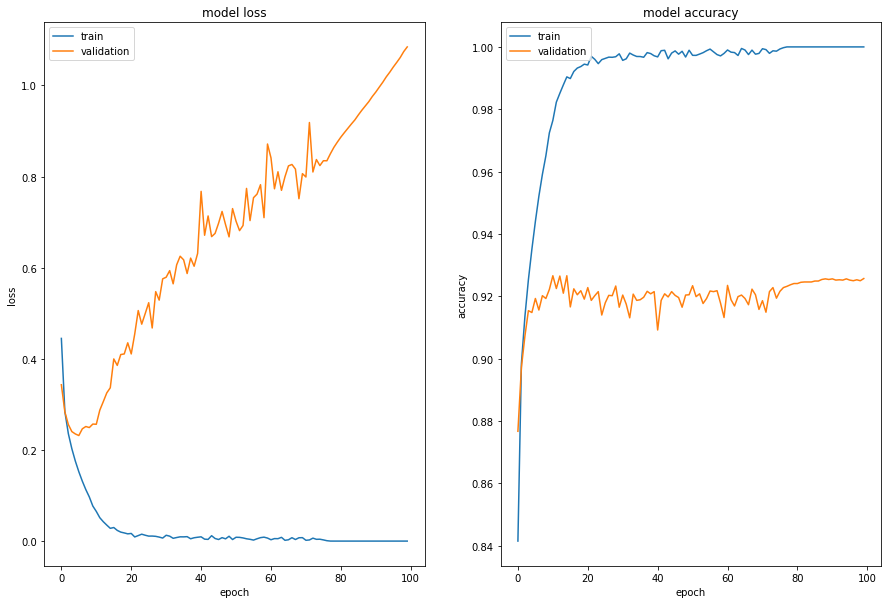

In [23]:
df_metriche = pd.DataFrame(modello_allenato.history)

fig , axes= plt.subplots(1,2)
# first plot
axes[0].plot(df_metriche.index , df_metriche['loss'] , df_metriche['val_loss'] )
axes[0].set_title('model loss')
axes[0].set(xlabel = 'epoch' , ylabel = 'loss')
axes[0].legend(['train', 'validation'] , loc = 'upper left')
#second plot
axes[1].plot(df_metriche.index , df_metriche['accuracy'] , df_metriche['val_accuracy'])
axes[1].set_title('model accuracy')
axes[1].set(xlabel = 'epoch' , ylabel = 'accuracy')
axes[1].legend(['train', 'validation'] , loc = 'upper left')
fig.set_figheight(10)
fig.set_figwidth(15)

In [24]:
df_metriche.loc[df_metriche['val_loss'] == df_metriche['val_loss'].min()]

loss  accuracy  val_loss  val_accuracy
5  0.152131  0.944017  0.231657        0.9193

I migliori pesi vengono calcolati alla **quinta** epoca dopo la quale il modello inizia a overfittare i dati, come possiamo notare dalla loss data sull'insieme di validazione.

Creiamo una funzione per plottare la ROC curve, che ci servirà per valutare i modelli successivamente.

In [52]:
from sklearn.metrics import roc_curve , auc
from sklearn.preprocessing import label_binarize
import itertools
def plot_auc(y_test ,y_score):
  y_test_bin = label_binarize(y_test, classes = [x for x in range(10)])
  y_score_bin = label_binarize(y_score, classes = [x for x in range(10)])

  n_classes = y_test_bin.shape[1]

  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i] , y_score_bin[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
  colors = itertools.cycle(['black','chocolate','lime','orange','darkviolet','slategray','purple','blue', 'red', 'green'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))
  plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic for multi-class data')
  plt.legend(loc="lower right")
  plt.show()

> # **SVM Classifier**<br />

L'SVM è una categoria di algoritmi di apprendimento supervisionato usato per la classificazione e per la predizione.<br>Nel primo caso l'obiettivo è di trovare il milgior separatore del set di dati in maniera geometrica. Il separatore può essere lineare o non-lineare.<br>
1.**Caso lineare**: l'algoritmo cerca il **pathway** più ampio possibile nel set di dati per dividere i dati attraverso un **iperpiano seraratore**. Se il problema è di tipo **hard margin** la soluzione è piuttosto semplice e consiste nel minimizzare la seguente funzione:
\begin{align}
\sum_{j=1}^m w_j^2
\end{align} sotto le seguenti restrizioni:
\begin{align}
\sum_{j=1}^m w_jx_{ij}\geq b+1\\ 
\sum_{j=1}^m w_jx_{ij} \leq b+1 
\end{align}  
Se il problema è di tipo **soft margin** dobbiamo considerare anche un trade-off tra violazioni e ampiezza del pathway:
\begin{align}
C\sum_{i=1}^N z_i+\sum_{j=1}^m w_j^2
\end{align}
dove,
\begin{align}
z_i=max(b+1-\sum_{j=1}^m w_jx_{ij},0)
\end{align}
se l'outcome è positivo,
\begin{align}
z_i=max(\sum_{j=1}^m w_jx_{ij}-(b-1),0),
\end{align}
se l'outcome è negativo.<br>
Per **j** numero di feature e **i** osservazioni, **C** iperparametro.<br>
2.**Caso non-lineare**: possiamo trovare diverse modalità di classificazione, l'approccio generale è quello di aggiungere una feature in più rispetto a quelle già presenti; il modello scelto per i nostri dati è il **radial basis function** che usa come distanza:
\begin{align}
\exp(-\gamma\sum_{j=1}^m (x_j-l_j)^2)
\end{align}Dove gamma è un iperparametro e le varie l sono i valori da una misura del kernel usato.

In [25]:
svc = SVC( kernel = 'rbf')
svc.fit(X_train , y_train)
print('Score sul validation set: ', svc.score(X_val,y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score sul validation set:  0.8795


Accuracy:  0.88775


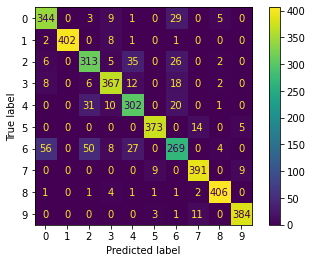

In [26]:
svc_y_pred = svc.predict(X_test)
cm = confusion_matrix(y_test, svc_y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
print('Accuracy: ', accuracy_score( y_test, svc_y_pred))

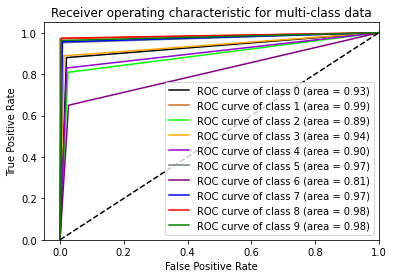

{0: array([0.       , 0.8797954, 1.       ]),
 1: array([0.        , 0.97101449, 1.        ]),
 2: array([0.        , 0.80878553, 1.        ]),
 3: array([0.        , 0.88861985, 1.        ]),
 4: array([0.        , 0.82967033, 1.        ]),
 5: array([0.        , 0.95153061, 1.        ]),
 6: array([0.        , 0.64975845, 1.        ]),
 7: array([0.        , 0.95599022, 1.        ]),
 8: array([0.       , 0.9736211, 1.       ]),
 9: array([0.        , 0.96240602, 1.        ])}

In [53]:
plot_auc(y_test , svc_y_pred)


> # **Regressione Logistica**
La regressione logistica è un algoritmo di classificazione. 
Inizialmente bisogna creare una **combinazione lineare** delle features e aggiungere un **bias**:<br>
\begin{align}
Y=a+\sum_{i=1}^Nb_i\cdot X_i
\end{align}
<br>Successivamente sfrutta le proprietà della funzione **sigmoide** per calcolare la probabilità di un determinato risultato della classificazione:
\begin{align}
Q = \frac{1}{1+\exp(- Y)}
\end{align}
<br>
Infine cerca di minimizzare la funzione di costo :
\begin{align}
-\frac{1}{n}[\sum_{pos-outcome}\ln Q+\sum_{neg-outcome}\ln(1-Q)]
\end{align}
<br>
Che deriva dal metodo statistico "maximum likelihood". Inoltre bisogna scegliere un numero 0< Z < 1 che confrontato con Q ci permette di distinguere se l'outcome sia positivo o negativo.
<br>Se nella classificazione vi sono più di due possibili outcome la distinzione è fatta tra l'elemento che appartiene alla classe e tutti gli altri che invece non vi appartengono (ci si riconduce alla binarità).




In [27]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('validation score:', log_reg.score(X_val, y_val))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


validation score: 0.8391666666666666


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Accuracy:  0.84425


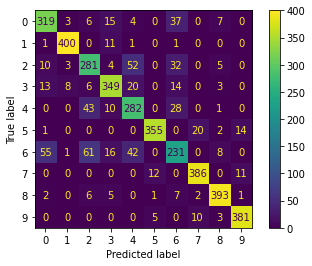

In [28]:
lr_y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, lr_y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
print('Accuracy: ', accuracy_score(y_test, lr_y_pred))

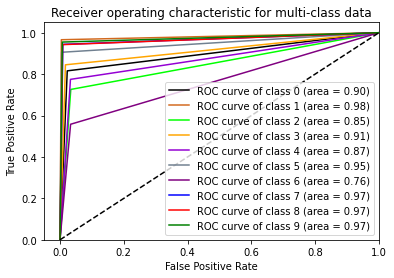

In [47]:
plot_auc(y_test , lr_y_pred)

> # **Decision Tree**
L'albero di decisione è un modello di apprendimneto supervisionato utile sia alla classificazione che alla predizione.L'obiettivo del modello è creare "percorsi" di decisione attraverso nodi binari, ogni percorso porterà ad una foglia corrispondente alla classe prevista dall'albero di decisione. <br>Nell'allenamento del modello in ogni nodo viene scelta una feature e un suo relativo valore che dividerranno il set di dati.<br>La misura che l'algortimo sfrutta per scegliere la feature e il suo relativo valore è l'**entropia**:
\begin{align}
\sum_{i=1}^N -p_i \cdot \log_{2} p_i
\end{align}
<br>L'algorimto in ogni nodo dovrà dividere il dataset secondo a feature che massimizza l'**information gain**, ottenuto come differenza tra l'entropia prima dello split e l'entropia attesa dopo lo split.



In [29]:
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, y_train)

print('validation score:', DecTree.score(X_val, y_val))

validation score: 0.7846666666666666


#Visualizziamo l'albero di decisione

In [30]:
from subprocess import call
from IPython.display import Image

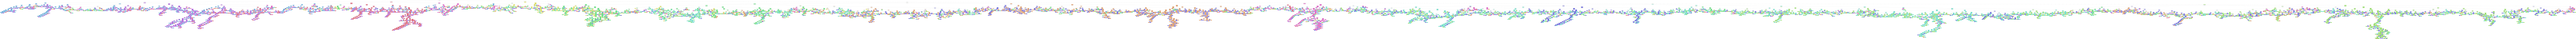

In [31]:
# Export as dot file
export_graphviz(DecTree, 
                out_file ='DecTree.dot', 
                feature_names = X_train.columns,
                class_names = class_map ,# ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','SneakerBag','Ankle boot'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Convert to png using system command (requires Graphviz)

call(['dot', '-Tpng', 'DecTree.dot', '-o', 'DecTree.png', '-Gdpi=600'])

# Display in jupyter notebook

Image(filename = 'DecTree.png')

Accuracy:  0.7995


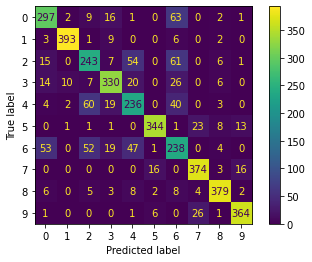

In [32]:
DT_y_pred = DecTree.predict(X_test)
cm = confusion_matrix(y_test, DT_y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
print('Accuracy: ', accuracy_score(y_test, DT_y_pred))

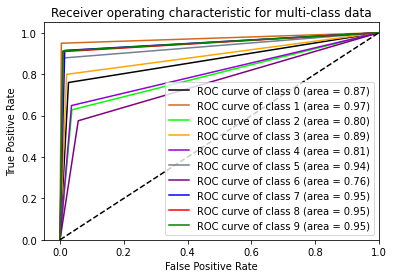

In [46]:
plot_auc(y_test , DT_y_pred)


> # **RANDOM FOREST** <br />
Il random forest è un algortimo di apprendimento supervisionato usato per la classificazione e per la regressione.<br />
Il suo scopo è quello di classificare attraverso una famiglia di decision tree (ensable learning) creati attraverso l'estrazione casuale di molteplici batch di dati dal dataset iniziale.
Si ricorda che il decision tree è un algortimo di classificazione che divide l'originario set di dati attraverso una misura chiamata Entropy (o alternativamente Gini) fino ad arrivare a dei subset di dati che hanno alta probabilità di appartenere alla classe determinata.<br>
Nel random forest non si sceglie necessariamente in ogni nodo il threshold o la feature migliore ma in maniera randomica, rendendo computazionalmente più efficente e meno time consuming l'allenamento.<br>La potenza del random forest è quella di unire tanti alberi di decisione non perfetti ma che insieme producono risultati più che sufficienti.

In [33]:
random_forest = RandomForestClassifier(n_estimators = 500 , criterion = 'entropy' , verbose = 1)
random_forest.fit(X_train , y_train)
print('Score sul validation set: ', random_forest.score(X_val , y_val))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  8.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Score sul validation set:  0.8748333333333334


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.9s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished


Accuracy sul test set:  0.88475


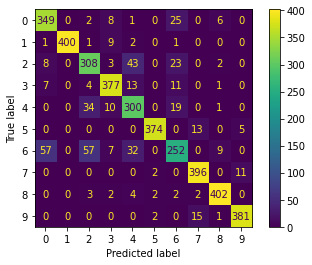

In [34]:
rf_y_pred = random_forest.predict(X_test)
cm = confusion_matrix(y_test, rf_y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()
print('Accuracy sul test set: ', accuracy_score(y_test, rf_y_pred))

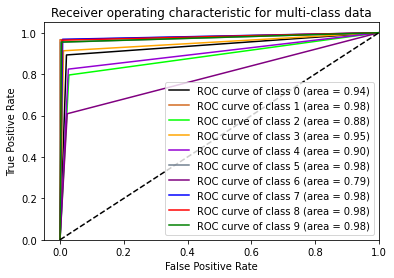

In [45]:
plot_auc(y_test , rf_y_pred)

# Visualizziamo un Tree dei 500

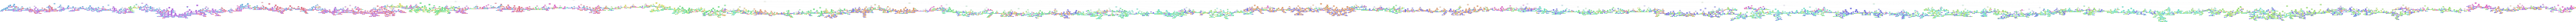

In [35]:
from sklearn.tree import export_graphviz
estimator = random_forest.estimators_[5]

# Export as dot file
export_graphviz(estimator, 
                out_file ='tree_from_the_forest.dot', 
                feature_names = X_train.columns,
                class_names =class_map ,# ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','SneakerBag','Ankle boot'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)
# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree_from_the_forest.dot', '-o', 'tree_from_the_forest.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_from_the_forest.png')



# ***Risultati***







# Creiamo un dataframe per vedere l'accuratezza per ogni modello sul set di test.
\begin{align}
ACC=(TP+TN)/(P+N)
\end{align}

In [36]:
accuracy_scores = np.zeros((5,)) 
predicted = [rf_y_pred , DT_y_pred, lr_y_pred, svc_y_pred]
for i in range(4):
  accuracy_scores[i] = accuracy_score(y_test, predicted[i])
accuracy_scores[4] = df_metriche.loc[4,'val_accuracy']


df = pd.DataFrame(accuracy_scores.T , columns = ['Accuracy'], index = ['random forest', 'decision tree', 'logistic regression', 'support vector machine', 'conv. neural net'])
df

Accuracy
random forest            0.88475
decision tree            0.79950
logistic regression      0.84425
support vector machine   0.88775
conv. neural net         0.91480

# Il modello migliore è la **CNN**.<br>Essendo l'algoritmo che meglio si presta a risolvere questo tipo di problemi.

*Potrebbero essere svolte ulteriori analisi per cercare i migliori parametri di ogni algoritmo.*

*Codice disponibile in [questa](https://github.com/mikiiiiiiiiiiiiiiiiiiii/progetto_esame_AI/blob/main/progetto_classificazione_con_dataset_keras.ipynb) repository github.*